## Lecture 8 Introduction to Maps

### Review of Lecture 7  

* 2-D NumPy arrays  
* Loading data files using np.loadtxt() and np.genfromtxt() functions  


### In this lecture we will:

- start to make some basic maps using **Basemap**, together with data points

There are many ways to make maps in Python. In this course, our maps in Python are plotted using the tools in **matplotlib**'s **Basemap** module. So the first thing we have to do is install the **basemap** module in *anaconda*:  
- first open your Anaconda Navigator
- then click the tab on the left named **environment**, here you can see what modules are installed in your Python environment
- Select the "Not installed" option from the first drop-down manu
- find the module called "basemap", select it and click the **apply** button in the bottom right corner
- a window will pop out and just proceed, now Anacoda is installing the basemap module for you automatically

Once the install is done, we need to import the basemap module. The syntax for importing is a bit different from what you are used to.  There is a package for **matplotlib** called **mpl_toolkits** which has a bunch of, well, toolkits in it.  One of those is **Basemap**:  

from mpl_toolkits.basemap import Basemap 

In [16]:
import numpy as np # import numpy
import matplotlib.pyplot as plt # import pyplot

#import os # build-in module OperatingSystem
#os.environ['PROJ_LIB'] = '/Users/patrickwu/share/proj' # setting the environment path for basemap

from mpl_toolkits.basemap import Basemap # import the basemap module using this syntax!

import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # import numpy
import matplotlib.pyplot as plt # import pyplot
from mpl_toolkits.basemap import Basemap # import basemap module using this syntax!

As you may see in your future study and research, there are many different types of maps for Earth Sciences.  A map is basically a projection tries to represent something that is essentially 3D (a globe) onto a 2D medium (a paper or a computer screen).  So all maps, except those at the smallest scale, will increasingly distort the area as the scale increases because the Earth is not flat. (well there is a modern flat earth society...)

When we choose a map projection, we seek the one that distorts the least for our purpose.  Here we will use a few popular projections, to make maps on both the global and local scale.  

Maps are instances of the Basemap class. They have many methods, for example: 
- outlining continents  
- draw national boundaries
- draw state boundaries 
- plotting geospatial data, such as sampling locations, earthquakes, 
- and much else.

Try **help(basemap)** and see what you can do with this module

Before we plot can plot a set of coordinates, they must be transformed from latitudes and longitudes to map coordinates and then plotted like anything else in matplotlib. In general we also need the **numpy** and **matplotlib.pyplot** modules as well.


### Mercator Projection  

To set up the map, you need to know what type of projection you want (there are 34 to choose from) and depending on the projection type you need to know the map boundaries and other particulars.  

We are starting  with the standard Mercator projection.  To do this, we set the  projection keyword to 'merc'.  For this and other _cylindrical_ projections, you need to specify these keywords:  

llcrnrlon:        longitude of lower left hand corner of the desired map

llcrnrlat:        latitude of lower left hand corner of the desired map

urcrnrlon:        longitude of upper right hand corner of the desired map
      
urcrnrlat:        latitude of upper right hand corner of the desired map

We make the map instance with a call like:  

**m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,llcrnrlon=0,urcrnrlon=360)**

We also have to put something on the map, so let's draw the coastlines by using the **drawcoastlines()** method: 

**m.drawcoastlines()**

Here's our first basic Mercator map of the whole world look like:

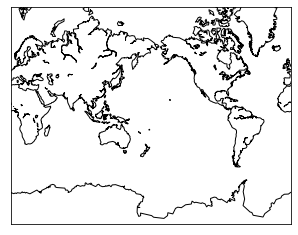

In [3]:
# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=0,urcrnrlon=360) 
m.drawcoastlines(); # put on the coastlines
plt.show() # show your map!

Let's make our first map look nicer, and put the zero degrees longitudude right in the middle of the plot:

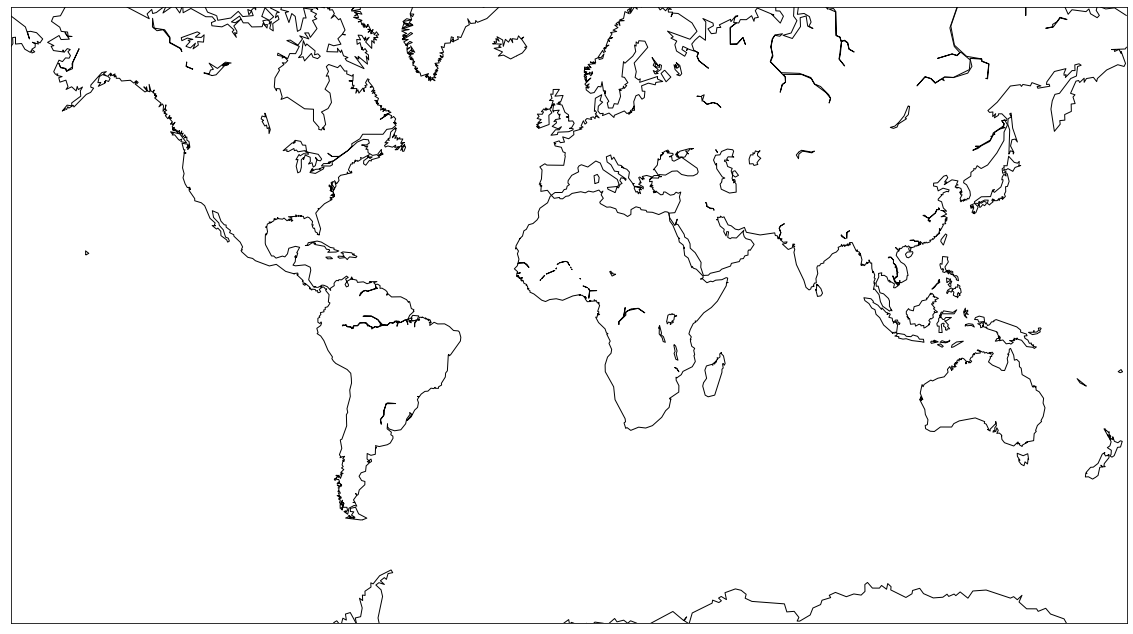

In [15]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,llcrnrlon=-180,urcrnrlon=180) 
m.drawcoastlines(); # put on the coastlines
plt.show() # show your map!

We usually want lines of latitude (parallels) and longitude (meridians) on there as well, so we use the **drawparallels( )** and **drawmeridians( )** methods: 

**m.drawparallels( )** and **m.drawmeridens( )** with **NumPy** ndarrays passed that specify the desired lines.   

These methods take lists or arrays of numbers, so remember that you can make arrays using **np.arange( )**

In most maps we want the lat/long labels to show, so let's modify the commands like this:

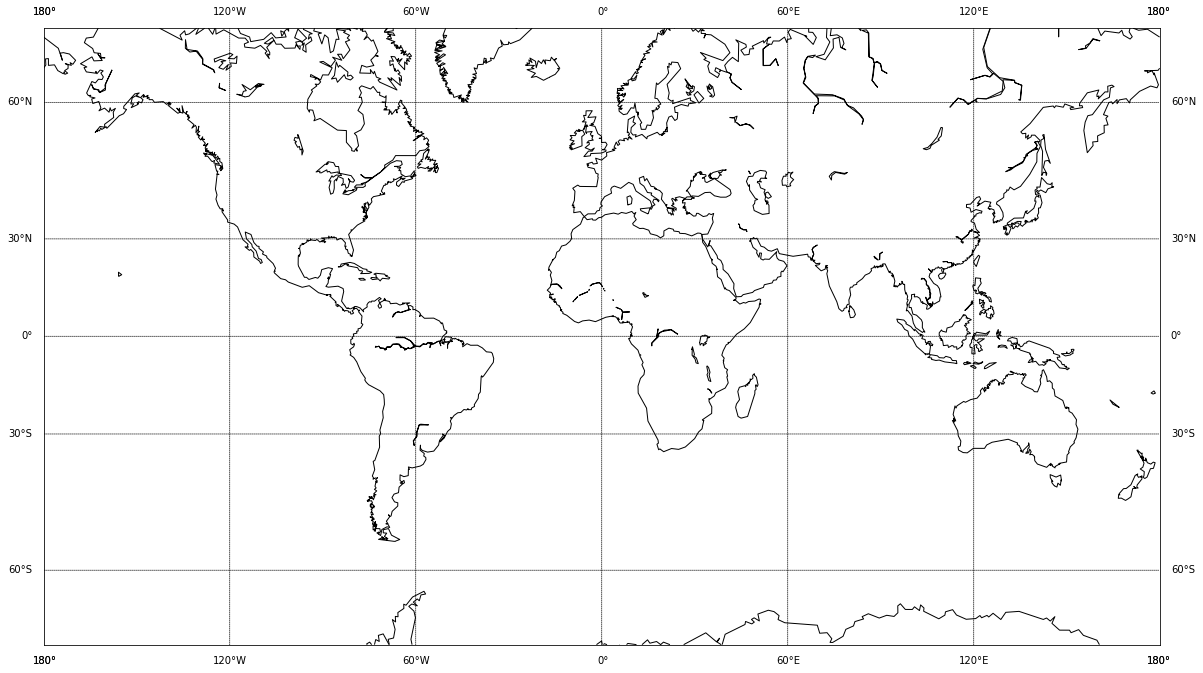

In [16]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,llcrnrlon=-180,urcrnrlon=180) 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,30.), labels=[True,True,False,False]) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,True,True]); # same for longitudes (meridians) but with 60 degree intervals

plt.show() # show your map!

The labels keyword tell the map object where to put the labels (left, right, top and bottom).  

Now maybe you want some color?  You can set the color of the continents with:

**m.fillcontinents(color='orange')**

and color in the oceans with: 

**m.drawmapboundary(fill_color='lightblue')**

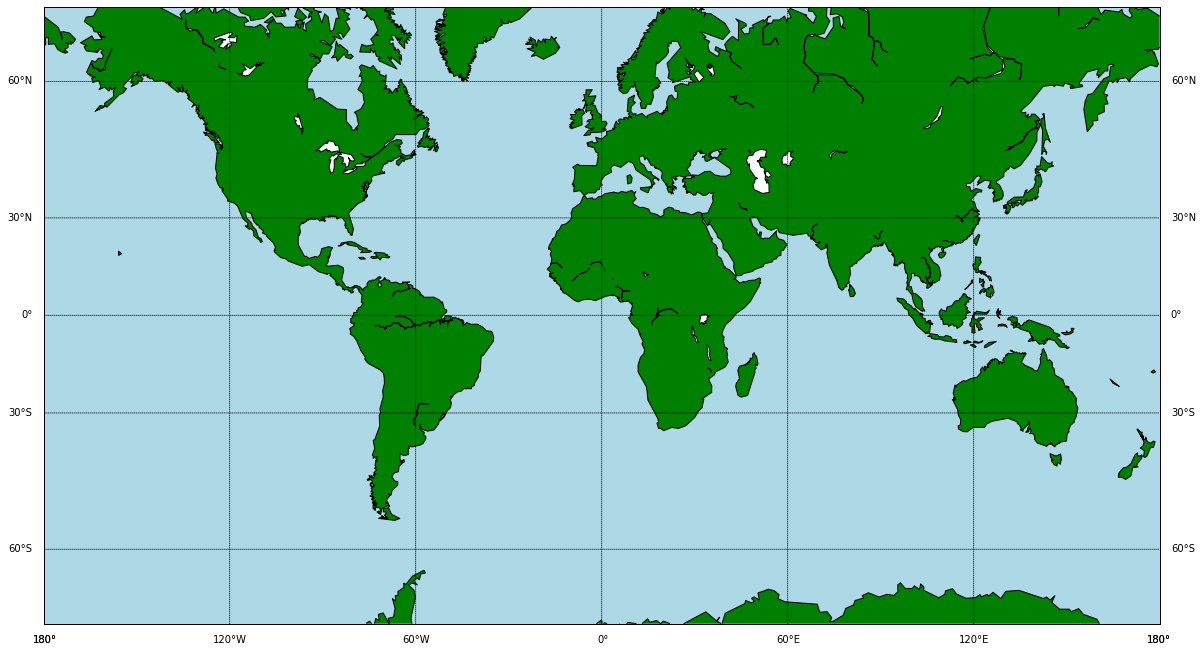

In [17]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,llcrnrlon=-180,urcrnrlon=180) 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,30.), labels=[True,True,False,False]) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True]); # same for longitudes (meridians) but with 60 degree intervals

m.fillcontinents(color='green')
m.drawmapboundary(fill_color='lightblue');

plt.show() # show your map!

hmmm, have you noticed that Lake Baikal and the Great Lakes are colored white? You can change lake colors using the *lake_color* keyword:
**m.fillcontinents(color='orange',lake_color='lightblue')** (try in the in-class practice)

Now you've got your first map created. To make your map more useful, you also want to put something **ON the map**. That's quite straightforward:

- Step 1: take your latitude and longitude (or arrays of them) and convert them to map coordinates. 
- Step 2: plot just like any ordinary matplotlib plot.

Let's plot the position of Hong Kong as a big orange star:

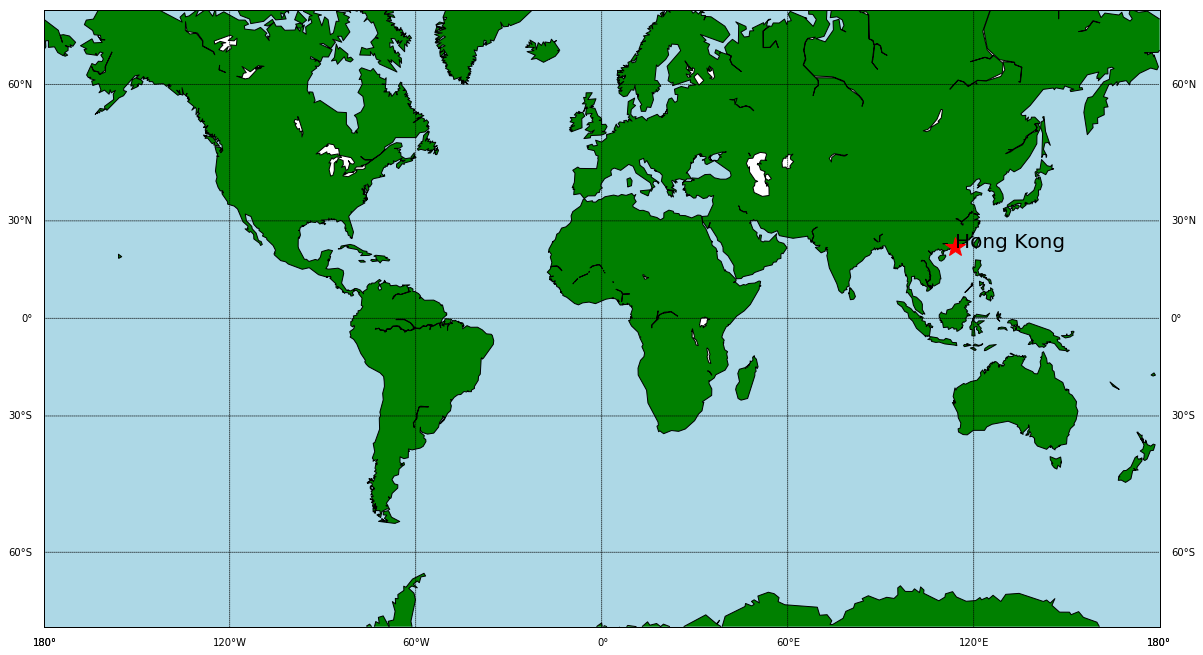

In [7]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,llcrnrlon=-180,urcrnrlon=180) 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,30.), labels=[True,True,False,False]) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True]); # same for longitudes (meridians) but with 60 degree intervals

m.fillcontinents(color='green')
m.drawmapboundary(fill_color='lightblue');

# set the lat and long of Hong Kong
HK_lat=22.3964   # latitude
HK_lon=114.1095  # longitude
x,y = m(HK_lon,HK_lat) # this will convert the lat,lon info to map coordinates x,y

# Plot the location of Hong Kong on your map and annotate it
plt.plot(x,y,'r*',markersize=20); # markersize sets the size of the marker
plt.text(x,y,'Hong Kong',fontsize=20) # annotate the marker 
plt.show() # show your map!

### Orthographic Projection

The Mercator is a nice classical map, but it sure does distort the map at high latitudes. Think back to the lecture on the hypsometric curves...  

Another type of map projection is the orthographic projection which is much less distorted. The downside to this projection is that you cannot see the whole globe at once.   To create an orthographic map, you initialize a map instance with the arguments **lon_0** and **lat_0** - the central longitude and latitude- instead of the lower left/upper right corner syntax. 

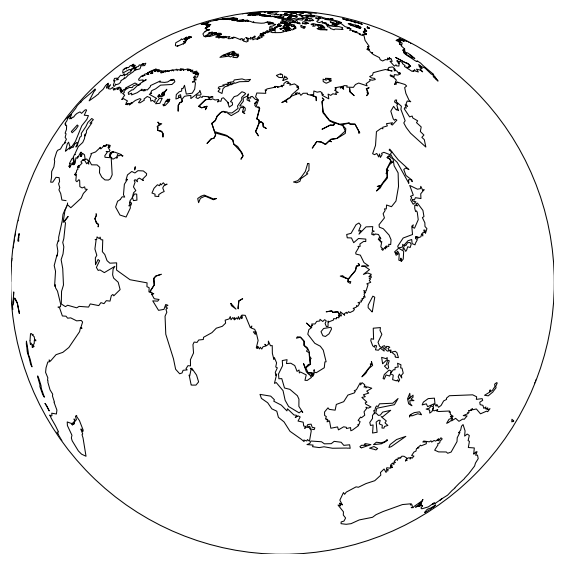

In [8]:
plt.figure(figsize=(10,10)) # create a new figure with size (16,15)

m = Basemap(projection='ortho',lon_0=100,lat_0=30)
m.drawcoastlines();

plt.show()

OK let's make it look nicer with labels and mark the location of Hong Kong on the map

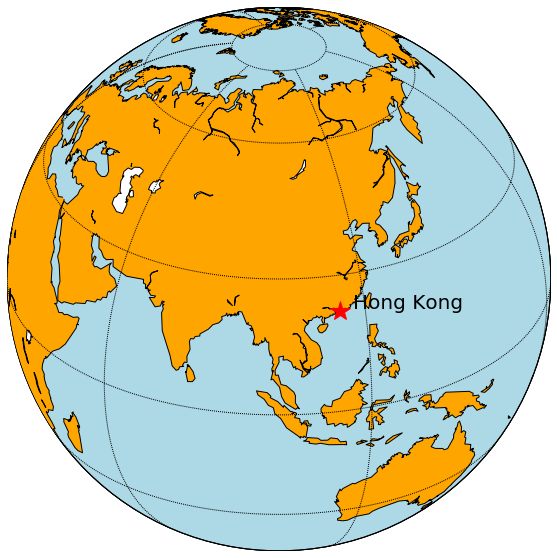

In [15]:
plt.figure(figsize=(10,10)) # create a new figure with size (16,15)

m = Basemap(projection='ortho',lon_0=100,lat_0=30)
m.drawcoastlines();

m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(0.,361.,60.))
m.drawmapboundary()

m.fillcontinents(color='orange')
m.drawmapboundary(fill_color='lightblue');

# set the lat and long of Hong Kong
HK_lat=22.3964
HK_lon=114.1095  # takes the longitude and converts to 0=>360
x,y=m(HK_lon,HK_lat) # this will convert the lat,lon info to map coordinates x,y
plt.plot(x,y,'r*',markersize=20); # markersize sets the size of the marker

text_lat = HK_lat 
text_lon = HK_lon + 3 # let's shift the text annotation 3 degrees eastward in longitude to make it look nicer
text_x,text_y=m(text_lon,text_lat) # this will convert the lat,lon info to map coordinates x,y
plt.text(text_x,text_y,'Hong Kong',fontsize=20) # put on the text annotation

plt.show()

### Hammer projection

One more global scale example of a map projection is the Hammer projection (one of the most popular).   This is always a global map centered on the equator, so all you need to specify is the central longitude (with the lon_0 argument). 

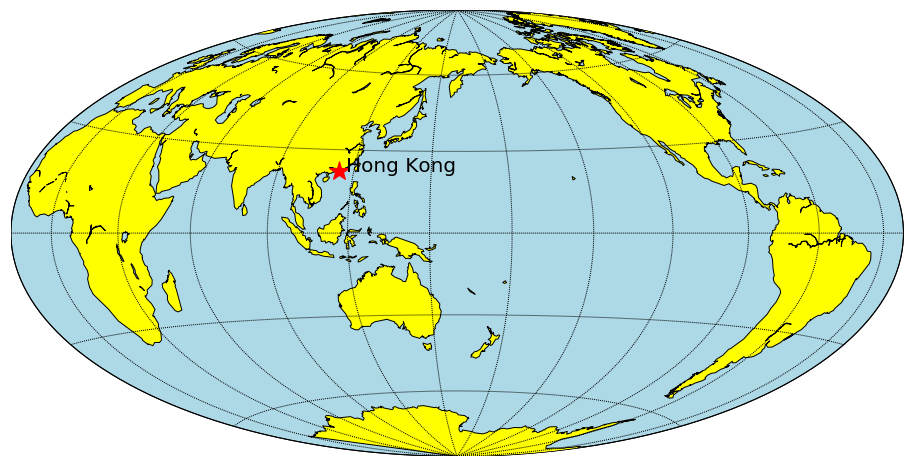

In [10]:
plt.figure(figsize=(16,10)) # create a new figure with size (16,15)


m = Basemap(projection='hammer',lon_0=-200) # make a Hammer map object
m.drawcoastlines()
m.fillcontinents(color='yellow',lake_color='lightblue')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,30.))
m.drawmapboundary(fill_color='lightblue')

# set the lat and long of Hong Kong
HK_lat=22.3964
HK_lon=114.1095  # takes the longitude and converts to 0=>360
x,y=m(HK_lon,HK_lat) # this will convert the lat,lon info to map coordinates x,y
plt.plot(x,y,'r*',markersize=20); # markersize sets the size of the marker

text_lat = HK_lat 
text_lon = HK_lon + 3 # let's shift the text annotation 3 degrees eastward in longitude to make it look nicer
text_x,text_y=m(text_lon,text_lat) # this will convert the lat,lon info to map coordinates x,y
plt.text(text_x,text_y,'Hong Kong',fontsize=20) # put on the text annotation

plt.show()

### Lambert conformal conic projections (lcc)

The maps we've explored so far are well and good for **global scale problems**, for example plotting the locations of earthquakes around the globe, but not so great for more **local problems**, like a map of sampling sites.  For this we need a smaller scale map and the Lambert confomal conic projection is a popular choice.  For this we must specify the map boundaries (with, e.g., llcrnrlon....)  and the central latitude and longitude (with lat_0 and lon_0).  

Here's what we know so far: 

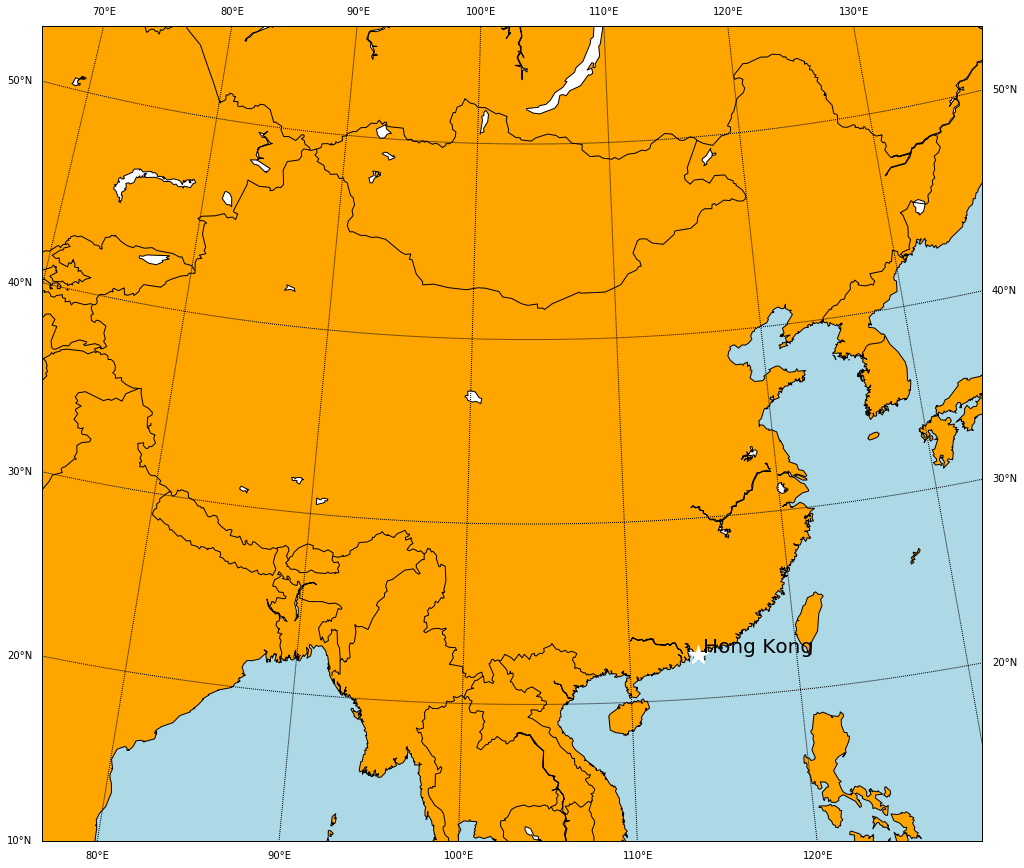

In [11]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='lcc',llcrnrlat=10,urcrnrlat=53,llcrnrlon=77,urcrnrlon=140,lat_0=23,lon_0=104,resolution='l') 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,10.), labels=[True,True,False,False]) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,True,True]); # same for longitudes (meridians) but with 60 degree intervals

m.fillcontinents(color='orange')
m.drawmapboundary(fill_color='lightblue');
m.drawcountries(color='black',linewidth=1)

# set the lat and long of San Diego
HK_lat=22.3964
HK_lon=114.1095  # takes the longitude and converts to 0=>360
x,y=m(HK_lon,HK_lat) # this will convert the lat,lon info to map coordinates x,y
plt.plot(x,y,'w*',markersize=20); # markersize sets the size of the marker
plt.text(x+30000,y+20000,'Hong Kong',fontsize=20,color='black')

plt.show() # show your map!


You might also want to know that there are other options for background colors (see https://matplotlib.org/basemap/users/geography.html).  

For example, you can use the NASA Blue Marble image, a shaded topo image or the etopo relief image as a background: 

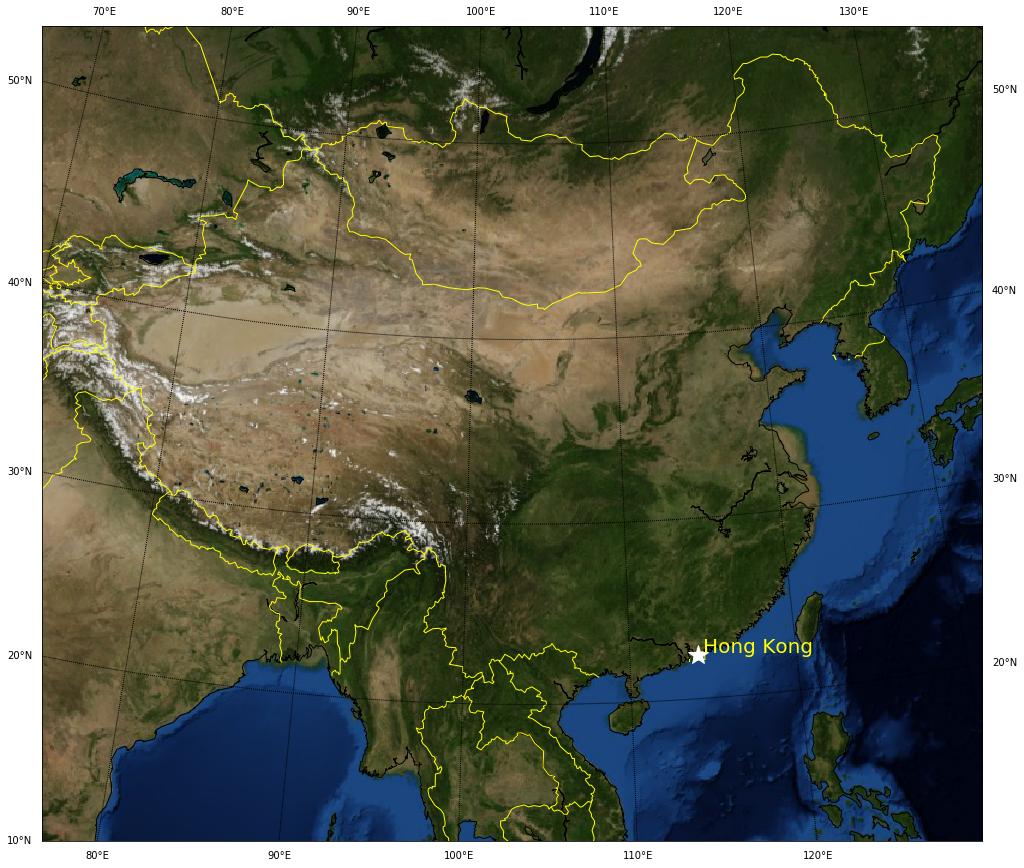

In [12]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='lcc',llcrnrlat=10,urcrnrlat=53,llcrnrlon=77,urcrnrlon=140,lat_0=23,lon_0=104,resolution='l') 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,10.), labels=[True,True,False,False]) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,True,True]); # same for longitudes (meridians) but with 60 degree intervals

m.drawcountries(color='yellow',linewidth=1)
m.bluemarble() # NASA's blue Marble image

# set the lat and long of San Diego
HK_lat=22.3964
HK_lon=114.1095  # takes the longitude and converts to 0=>360
x,y=m(HK_lon,HK_lat) # this will convert the lat,lon info to map coordinates x,y
plt.plot(x,y,'w*',markersize=20); # markersize sets the size of the marker
plt.text(x+30000,y+20000,'Hong Kong',fontsize=20,color='yellow')

plt.show() # show your map!

Here's another type of map called etopo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


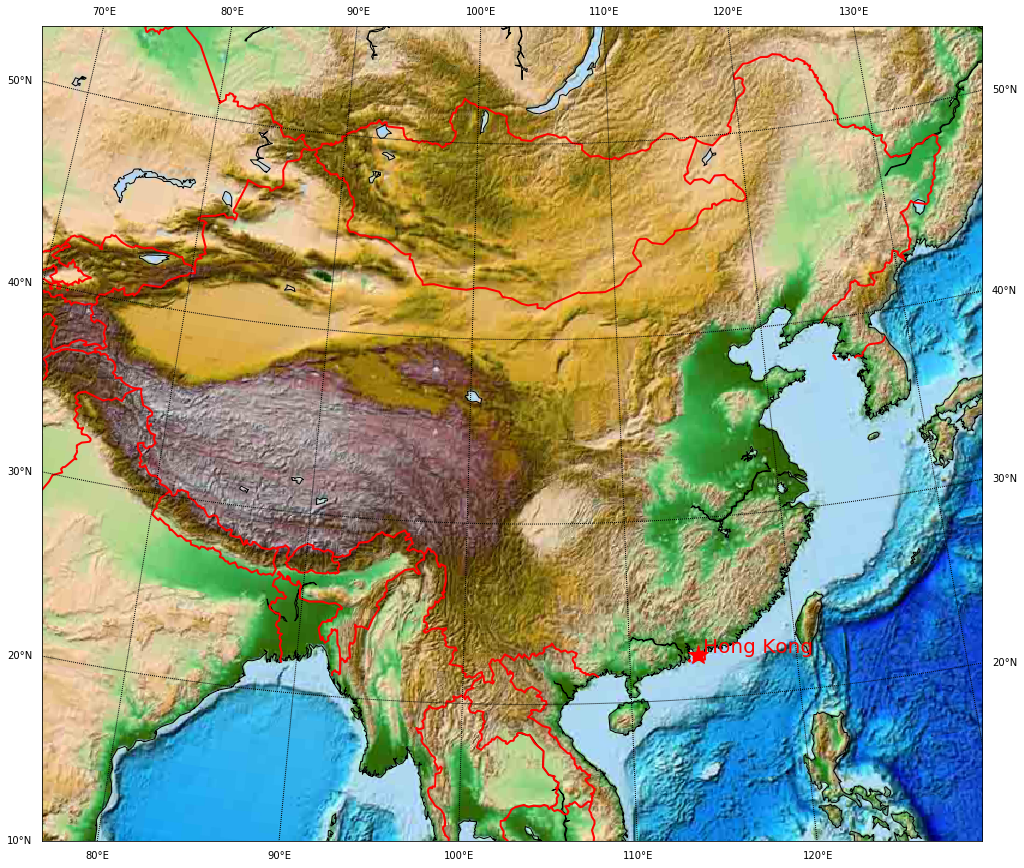

In [13]:
plt.figure(figsize=(20,15)) # create a new figure with size (16,15)

# make a map instance called 'm', pay attention to the boundaries of the map
m = Basemap(projection='lcc',llcrnrlat=10,urcrnrlat=53,llcrnrlon=77,urcrnrlon=140,lat_0=23,lon_0=104,resolution='l') 
m.drawcoastlines(); # put on the coastlines

m.drawparallels(np.arange(-90.,91.,10.), labels=[True,True,False,False]) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,True,True]); # same for longitudes (meridians) but with 60 degree intervals

m.drawcountries(color='red',linewidth=2)
m.etopo() # NASA's blue Marble image

# set the lat and long of San Diego
HK_lat=22.3964
HK_lon=114.1095  # takes the longitude and converts to 0=>360
x,y=m(HK_lon,HK_lat) # this will convert the lat,lon info to map coordinates x,y
plt.plot(x,y,'r*',markersize=20); # markersize sets the size of the marker
plt.text(x+30000,y+20000,'Hong Kong',fontsize=20,color='red')

plt.show() # show your map!

### Now let's do science!

Now let's find out where Earthquakes happen on Earth:

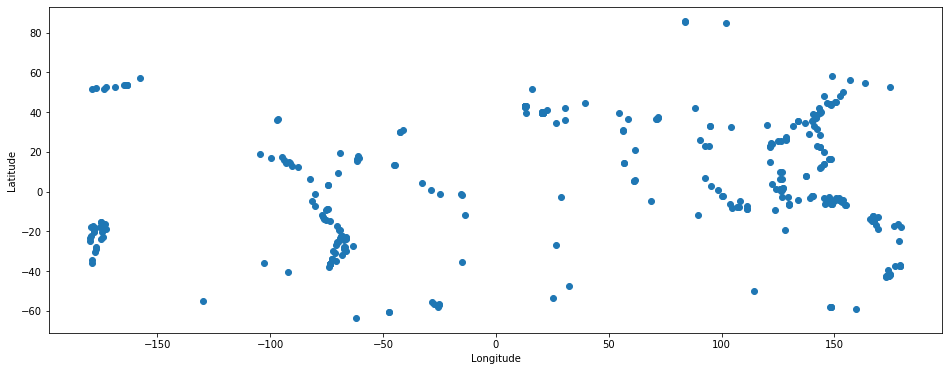

In [7]:
EQ = np.loadtxt('earthquake.csv', delimiter=',',skiprows = 1)

lat = EQ[:,0]
lon = EQ[:,1]
dep = EQ[:,2]
mag = EQ[:,3]

plt.figure(figsize=(16,6))
plt.scatter(lon,lat)
plt.xlabel('Longitude'),plt.ylabel('Latitude')
plt.show()

Oops, we got a bunch of points seem to have some sort of pattern, but it's really hard to tell what it is. Now we need maps:

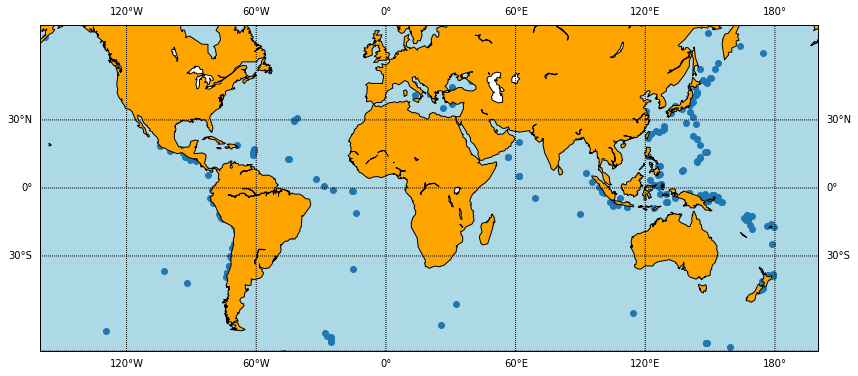

In [18]:
EQ = np.loadtxt('earthquake.csv', delimiter=',',skiprows=1)
disa = EQ[:,3]>7.5

lat = EQ[:,0]
lon = EQ[:,1]
dep = EQ[:,2]
mag = EQ[:,3]

plt.figure(figsize=(16,6))
m = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=60,\
            llcrnrlon=-160,urcrnrlon=200) # make a map instance called 'm'
m.drawcoastlines(); # put on the coastlines
m.drawparallels(np.arange(-90.,91.,30.), labels=[True,True,False,False]) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,True,True]); # same for longitudes (meridians) but with 60 degree intervals
m.fillcontinents(color='orange')
m.drawmapboundary(fill_color='lightblue');
x, y = m(lon,lat)
plt.scatter(x,y)
plt.show()